In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np 
import pandas as pd

from modeller import Modeller

import seaborn as sns
import matplotlib.pyplot as plt 

from smoother import Smoother

# Prepare Demand price

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date'>

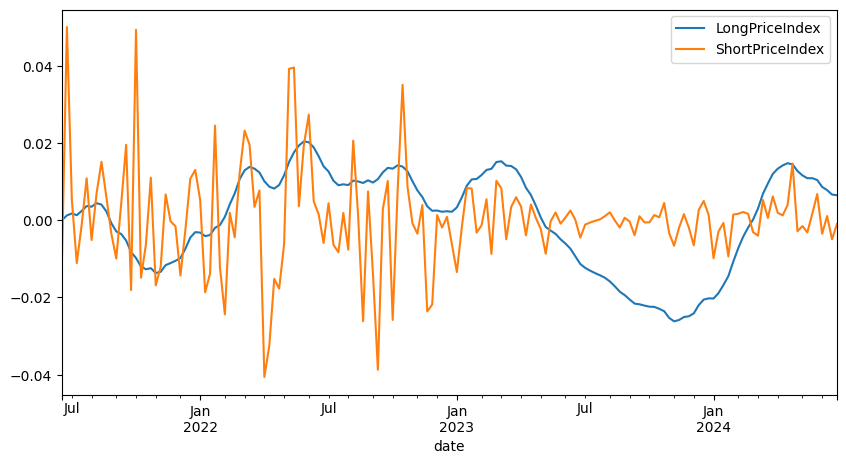

In [7]:
# Price Index
price_index_imputed = Smoother().Impute(data['PriceIndex'].values)


long_price_index = Smoother().Smooth(price_index_imputed, method='MCMC')
short_price_index = price_index_imputed - long_price_index

data['LongPriceIndex'] = long_price_index - long_price_index[0]
data['ShortPriceIndex'] = short_price_index

fig, ax = plt.subplots(1,1, figsize=(10,5))
data[['LongPriceIndex', 'ShortPriceIndex']].plot.line(ax=ax)

# Brand Model

Берем модель M2 без радио но с ООН. ООН переоценен но ни на что другое не влияет

## M1  все медиа как есть

In [5]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'data.xlsx', index_col='date')

In [6]:
spec = {
    'y': ['Brand'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH', 'Radio'],
        'media_competitors': ['CompetsMedia'],
    }
}

In [21]:
m1 = Modeller("Brand").PrepNoFit(data, spec)
m1.Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [22]:
decomp = m1.GetDecomposition()#.plot.line()
decomp.head()

base media_own                                                \
                   0   TV Yoga TV fig skates TV Launch TV 220 pack TV Skates   
date                                                                           
2021-06-21  0.808200  0.000000           0.0       0.0         0.0       0.0   
2021-06-28  0.807710  0.004395           0.0       0.0         0.0       0.0   
2021-07-05  0.806250  0.008014           0.0       0.0         0.0       0.0   
2021-07-12  0.803287  0.010618           0.0       0.0         0.0       0.0   
2021-07-19  0.798056  0.012565           0.0       0.0         0.0       0.0   

                                                            media_competitors  \
           TV NCP promo       OLV Digital other   OOH Radio      CompetsMedia   
date                                                                            
2021-06-21          0.0  0.000107       0.002746  0.0   0.0         -0.000028   
2021-06-28          0.0  0.001495       0.004392  0.0   0.0         -0.000733   
2021-07-05          0.0  0.002879       0.005382  0.0   0.0         -0.001804   
2021-07-12          0.0  0.004055       0.006069  0.0   0.0         -0.002963   
2021-07-19          0.0  0.004787       0.006577  0.0   0.0         -0.004106   

                   y  
                   0  
date                  
2021-06-21  0.810014  
2021-06-28  0.816227  
2021-07-05  0.820914  
2021-07-12  0.822085  
2021-07-19  0.818903

In [10]:
m1.PlotFit()
m1.PlotDecomposition()
m1.PlotMediaDecomposition()

In [213]:
samples = brand_model.GetSamples()
samples.keys()

dict_keys(['base', 'base_drift_scale', 'base_init', 'comp_media_beta', 'comp_media_retention', 'media', 'media_beta', 'media_retention', 'noise_scale'])

<Axes: ylabel='Count'>

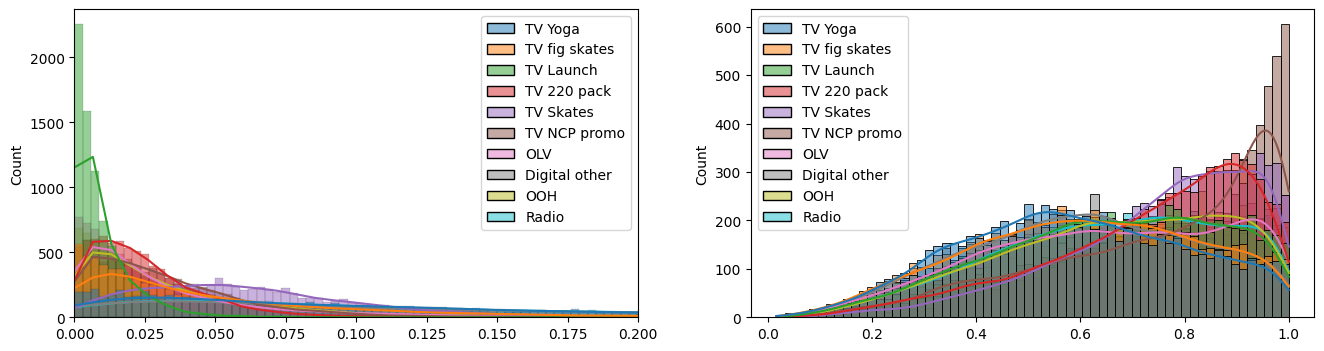

In [225]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

sns.histplot(pd.DataFrame(samples['media_beta'], columns=brand_model.spec['X']['media_own']), kde=True, ax=axs[0])
axs[0].set_xlim(0, 0.2)
sns.histplot(pd.DataFrame(samples['media_retention'], columns=brand_model.spec['X']['media_own']), kde=True, ax=axs[1])

## M2 убрали радио

In [49]:
spec = {
    'y': ['Brand'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'Digital', 'OOH'],
        'media_competitors': ['CompetsMedia'],
    }
}

m2 = Modeller("Brand").Fit(data, spec)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

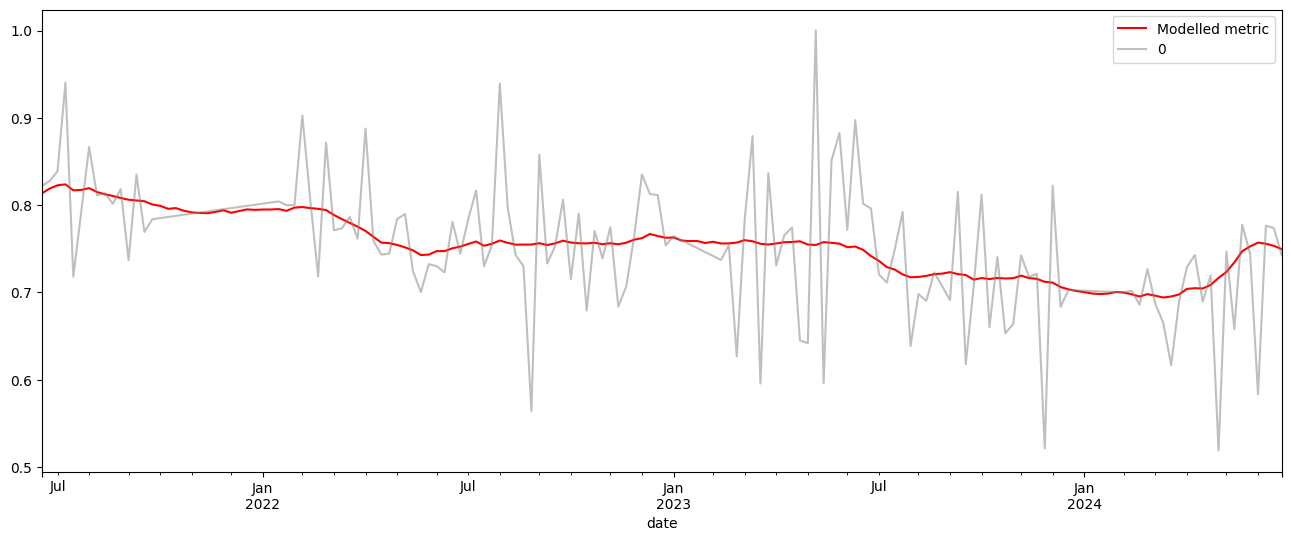

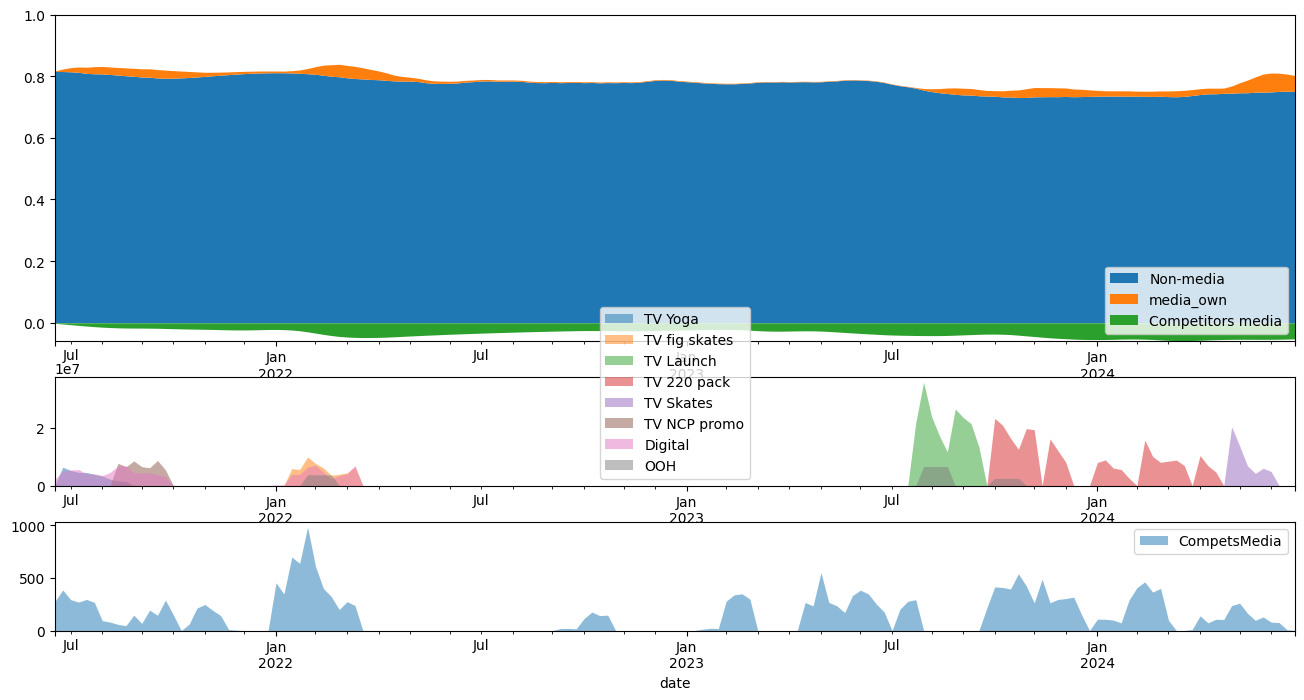

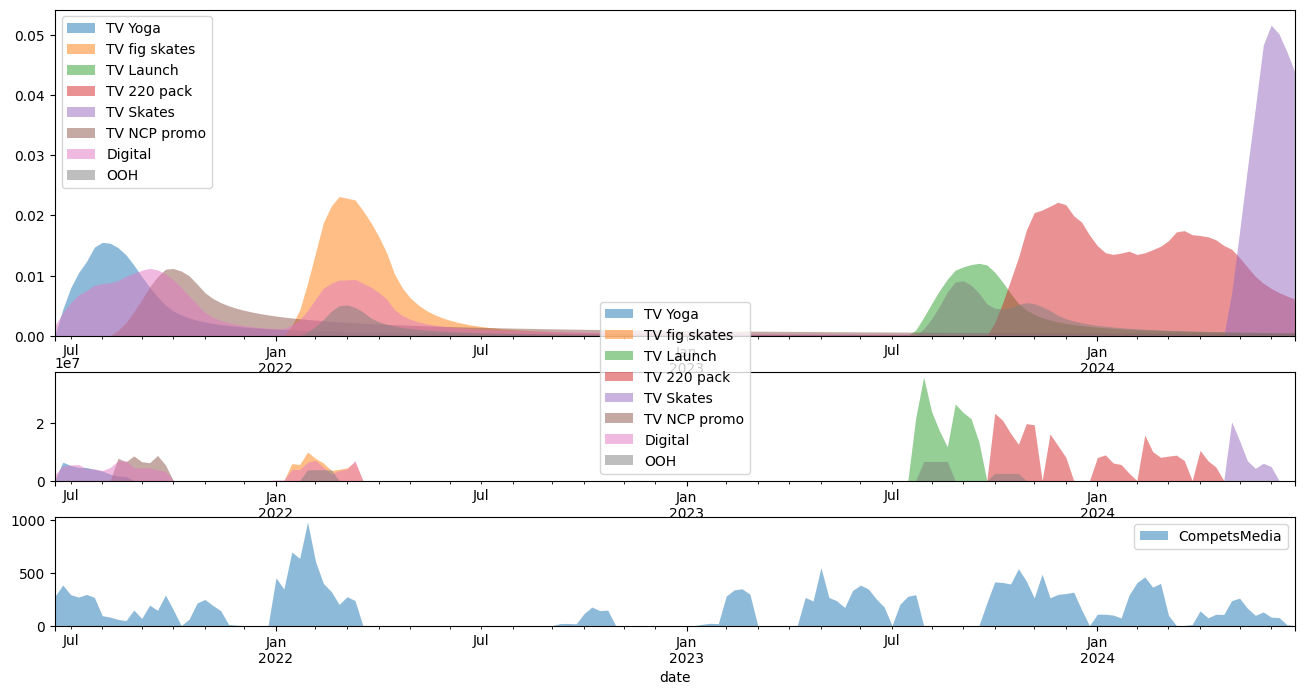

In [50]:
m2.PlotFit()
m2.PlotDecomposition()
m2.PlotMediaDecomposition()

<Axes: ylabel='Count'>

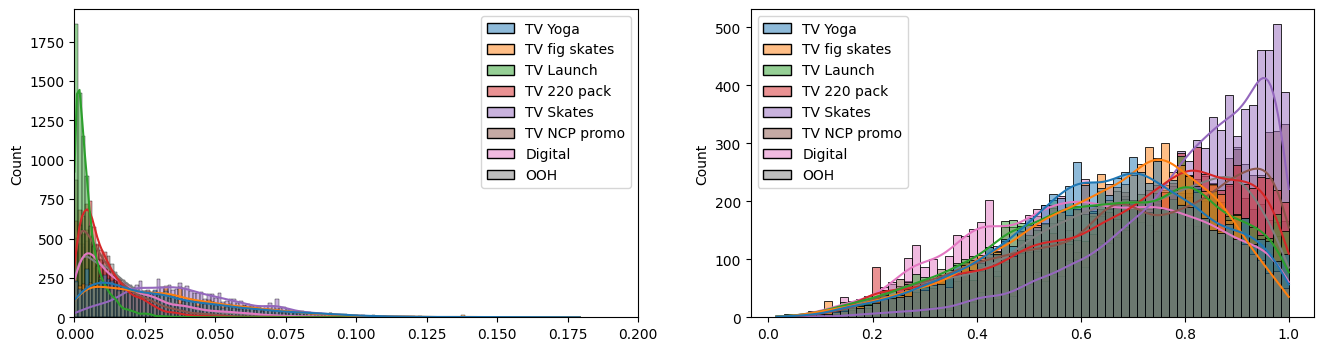

In [51]:
samples = m2.GetSamples()
M = m2

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

sns.histplot(pd.DataFrame(samples['media_beta'], columns=M.spec['X']['media_own']), kde=True, ax=axs[0])
axs[0].set_xlim(0, 0.2)
sns.histplot(pd.DataFrame(samples['media_retention'], columns=M.spec['X']['media_own']), kde=True, ax=axs[1])

## M3 убрали ООН

In [44]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'data.xlsx')
data.index = data['date']

spec = {
    'y': ['Brand'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'Digital'],
        'media_competitors': ['CompetsMedia'],
    }
}

m3 = Modeller("Brand").Fit(data, spec)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

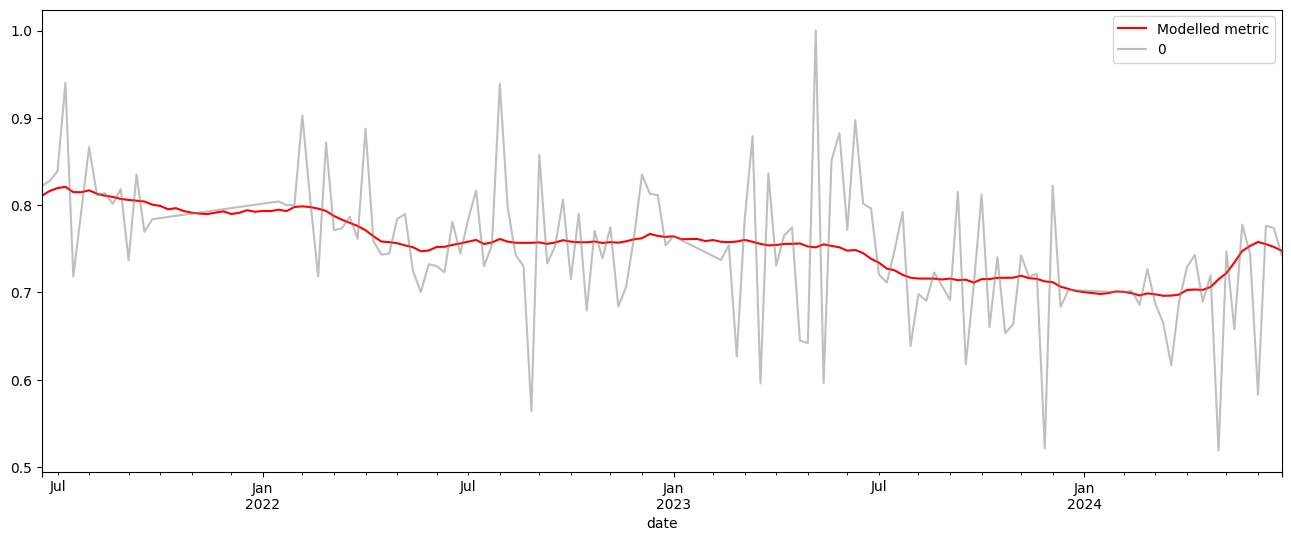

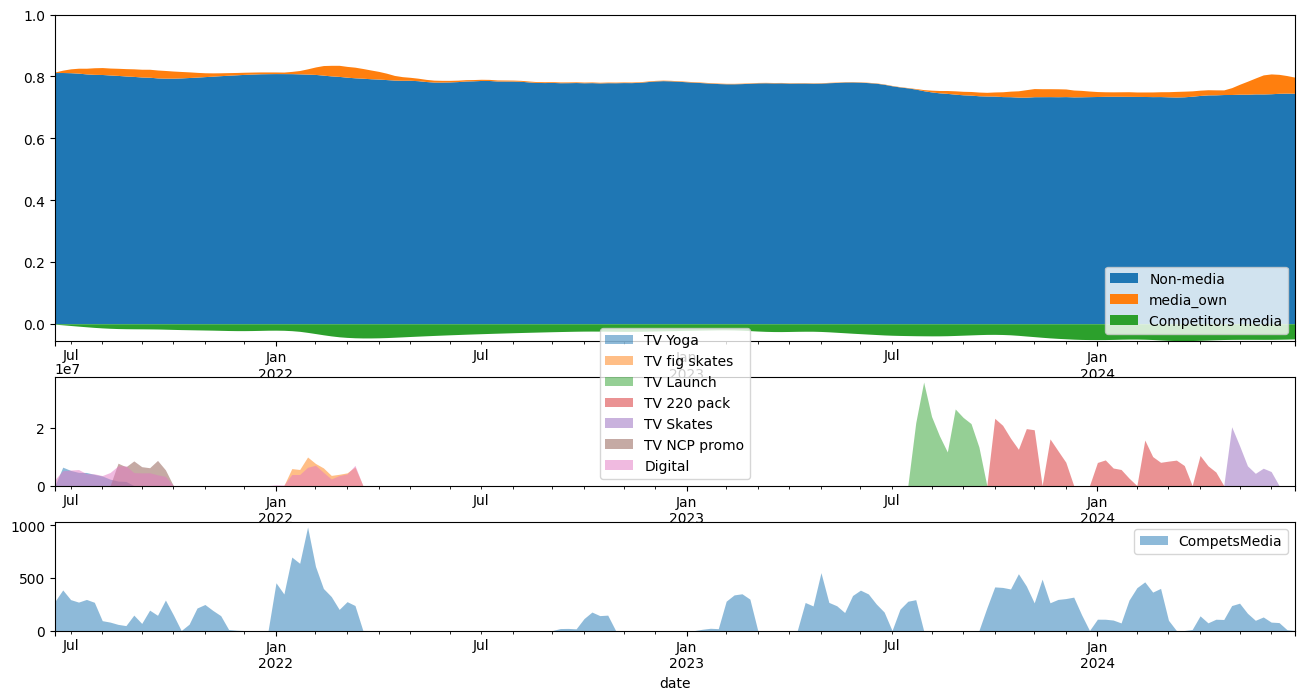

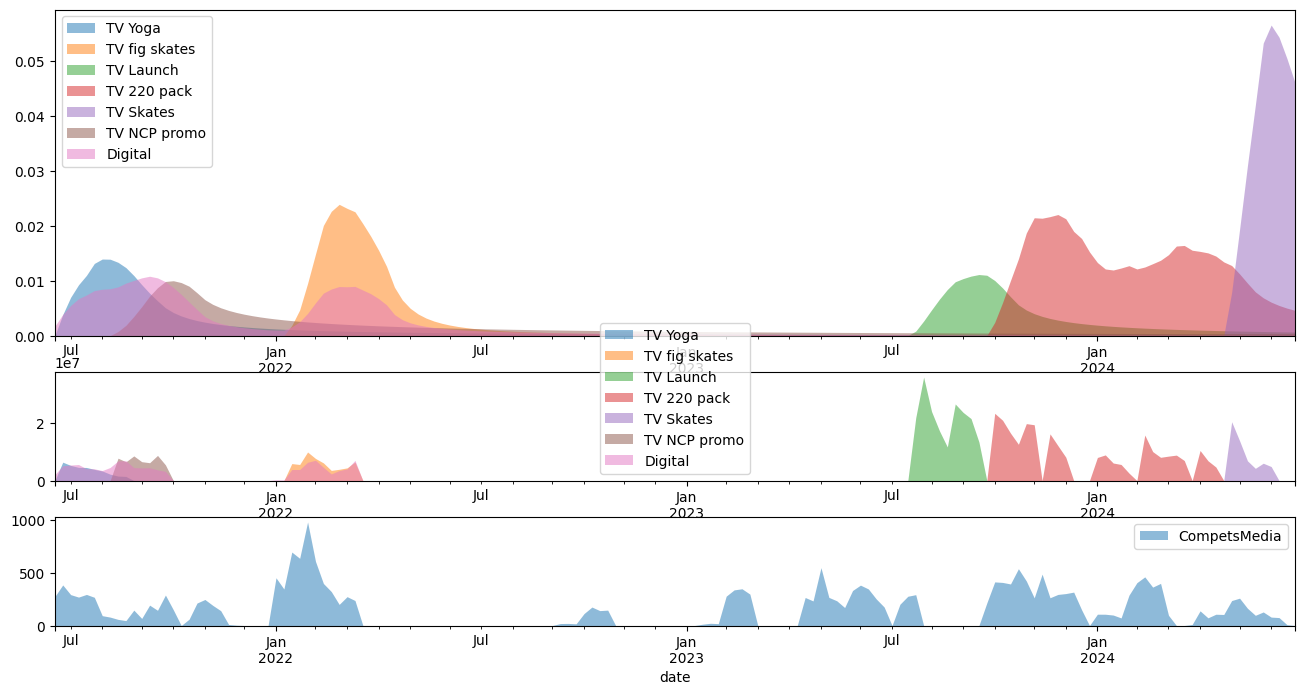

In [45]:
m3.PlotFit()
m3.PlotDecomposition()
m3.PlotMediaDecomposition()

## Get brand base

In [53]:
final_brand_model = m2

<Axes: xlabel='date', ylabel='0'>

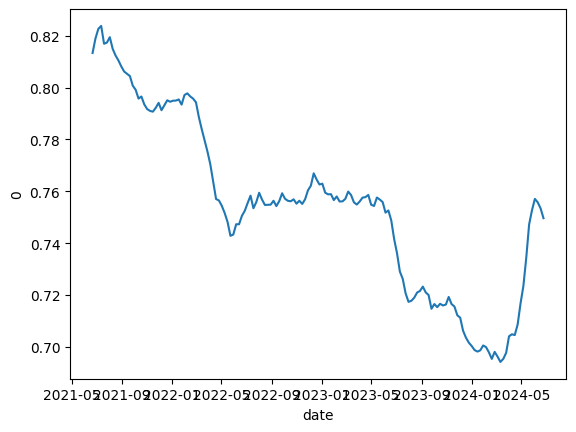

In [59]:
brand_metric = final_brand_model.decomposition['y'][0]
sns.lineplot(brand_metric)

# Final Model

In [4]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'data.xlsx', index_col='date')

## Additional vars

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date', ylabel='Category'>

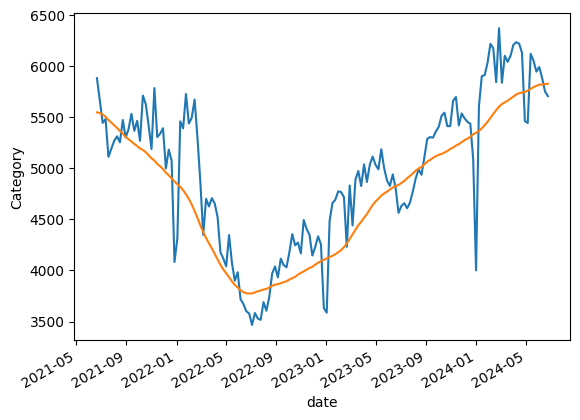

In [67]:
# move brand to data
data['Brand modeled'] = brand_metric

# category demand
sns.lineplot(data['Category'])
data['Demand'] = Smoother().Smooth(data['Category'].values, method='MCMC', seasonality=52)
data['Demand'].plot.line()

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date'>

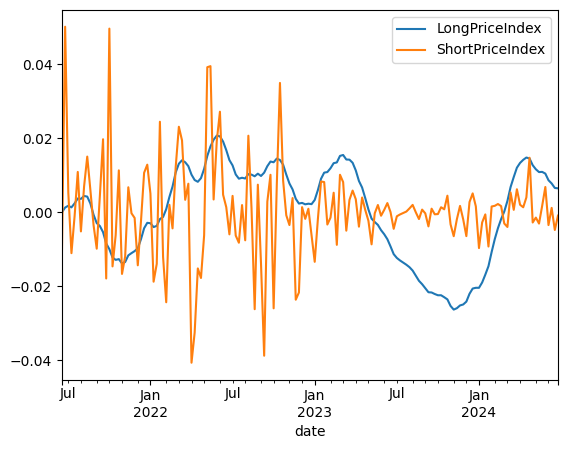

In [68]:
# Price Index
price_index_imputed = Smoother().Impute(data['PriceIndex'].values)

long_price_index = Smoother().Smooth(price_index_imputed, method='MCMC')
short_price_index = price_index_imputed - long_price_index

data['LongPriceIndex'] = long_price_index - long_price_index[0]
data['ShortPriceIndex'] = short_price_index

data[['LongPriceIndex', 'ShortPriceIndex']].plot.line()

## data file with extras

In [7]:
#data.to_excel(data_folder + 'full_data.xlsx')
data = pd.read_excel(data_folder + 'full_data.xlsx', index_col='date')
data.head()

TV Yoga  TV fig skates  TV Launch  TV 220 pack  TV Skates  \
date                                                                         
2021-06-21           NaN            NaN        NaN          NaN        NaN   
2021-06-28  6.350031e+06            NaN        NaN          NaN        NaN   
2021-07-05  5.232049e+06            NaN        NaN          NaN        NaN   
2021-07-12  4.552183e+06            NaN        NaN          NaN        NaN   
2021-07-19  4.519352e+06            NaN        NaN          NaN        NaN   

            TV NCP promo           OLV  Digital other   OOH  Radio  ...  \
date                                                                ...   
2021-06-21           NaN  1.322187e+05    1.925544e+06  NaN    NaN  ...   
2021-06-28           NaN  3.400359e+06    1.722387e+06  NaN    NaN  ...   
2021-07-05           NaN  3.942284e+06    1.423433e+06  NaN    NaN  ...   
2021-07-12           NaN  4.073557e+06    1.461453e+06  NaN    NaN  ...   
2021-07-19           NaN  2.654426e+06    1.448619e+06  NaN    NaN  ...   

               Category  CompetsMedia  PromoPercent       Digital  OOH old  \
date                                                                         
2021-06-21  5882.777017    275.164170      0.818684  2.057762e+06      NaN   
2021-06-28  5663.366536    384.805850      0.796927  5.122745e+06      NaN   
2021-07-05  5445.539634    293.025643      0.767696  5.365717e+06      NaN   
2021-07-12  5482.488767    269.542802      0.723108  5.535010e+06      NaN   
2021-07-19  5112.499507    294.781437      0.745292  4.103046e+06      NaN   

            OOH new  Brand modeled       Demand  LongPriceIndex  \
date                                                              
2021-06-21      NaN       0.813376  5548.090332        0.000000   
2021-06-28      NaN       0.818947  5542.074219        0.001255   
2021-07-05      NaN       0.822666  5527.208984        0.001733   
2021-07-12      NaN       0.823816  5505.040039        0.001300   
2021-07-19      NaN       0.816927  5474.071289        0.002382   

            ShortPriceIndex  
date                         
2021-06-21        -0.010424  
2021-06-28         0.050045  
2021-07-05         0.005353  
2021-07-12        -0.011056  
2021-07-19        -0.001034  

[5 rows x 26 columns]

## Model 1

In [13]:
Modeller("upd")

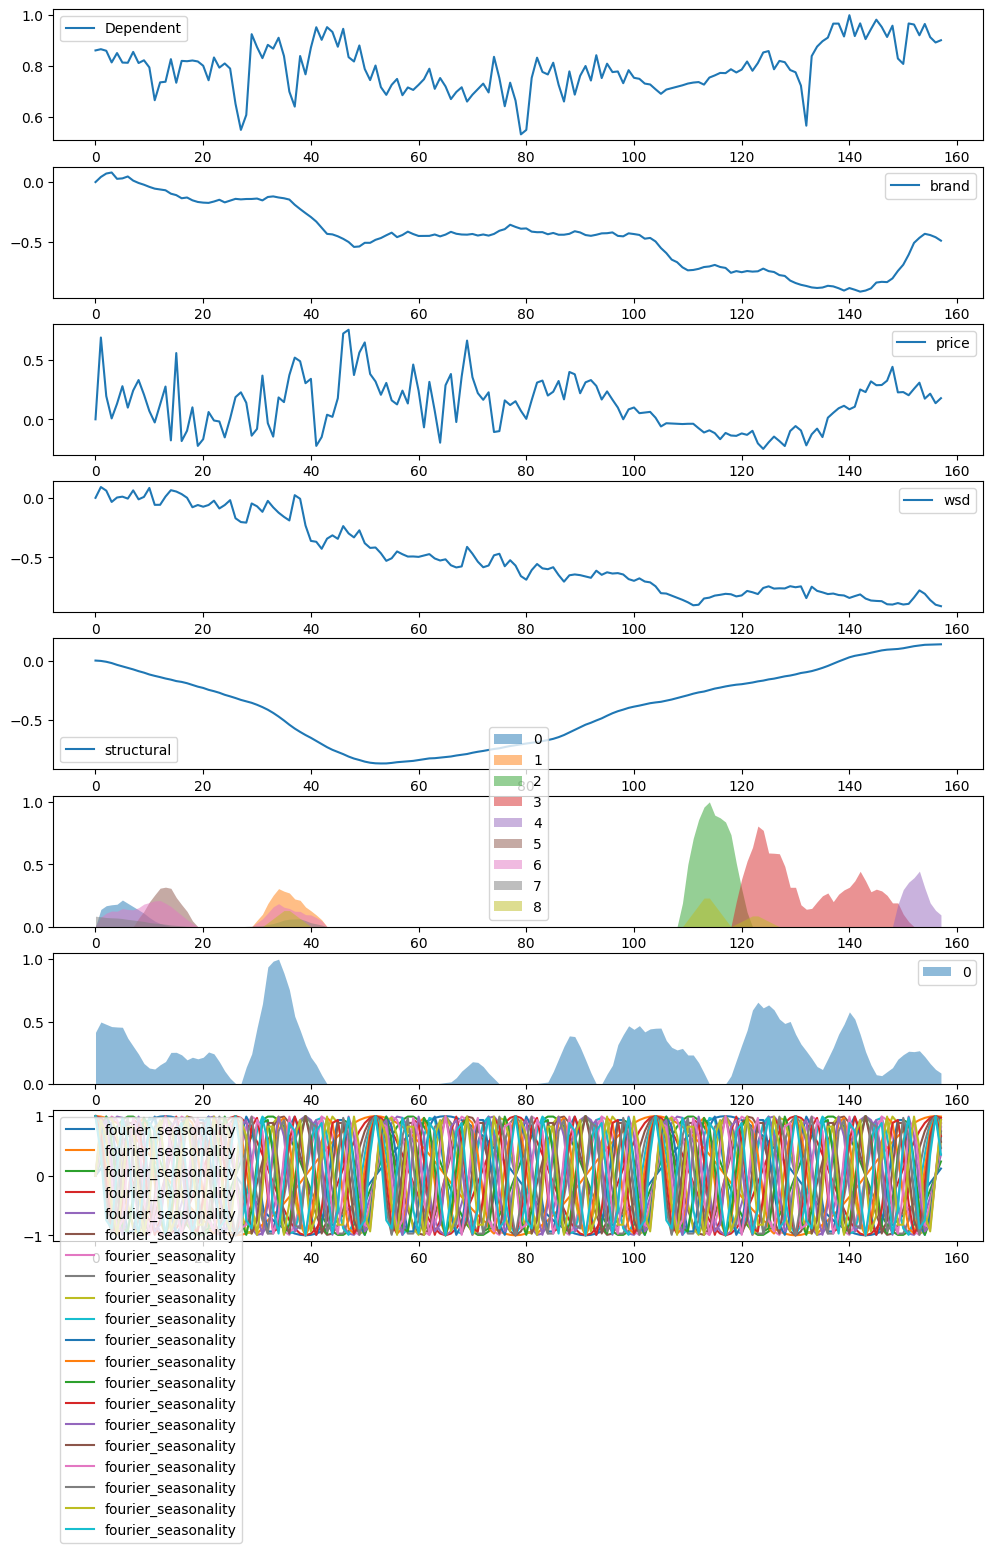

In [26]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['PriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        'wsd': ['CWSD']
    }
}
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm1.PlotInputs()

In [28]:
sm1 = Modeller(
    "Sales", 
    seasonality_period=52, 
    seasonality_model='fourier', 
    seasonality_num_fouries_terms=10).Fit(data, spec, num_samples=2000)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [21]:
sm1.GetDecomposition()

base media_own                                                \
                   0   TV Yoga TV fig skates TV Launch TV 220 pack TV Skates   
date                                                                           
2021-06-21  0.851272  0.000000      0.000000  0.000000    0.000000  0.000000   
2021-06-28  0.850995  0.004516      0.000000  0.000000    0.000000  0.000000   
2021-07-05  0.844586  0.008456      0.000000  0.000000    0.000000  0.000000   
2021-07-12  0.831808  0.011476      0.000000  0.000000    0.000000  0.000000   
2021-07-19  0.828756  0.013869      0.000000  0.000000    0.000000  0.000000   
...              ...       ...           ...       ...         ...       ...   
2024-05-27  0.809378  0.000434      0.000900  0.008045    0.022717  0.052715   
2024-06-03  0.816277  0.000431      0.000891  0.007859    0.020929  0.056636   
2024-06-10  0.814472  0.000428      0.000883  0.007681    0.019459  0.055362   
2024-06-17  0.816437  0.000425      0.000874  0.007512    0.018216  0.052480   
2024-06-24  0.821140  0.000422      0.000866  0.007349    0.017144  0.049086   

                                                            seasonal         y  
           TV NCP promo       OLV Digital other        OOH         0         0  
date                                                                            
2021-06-21     0.000000  0.000135       0.002987  0.000000 -0.001767  0.850901  
2021-06-28     0.000000  0.001901       0.004992  0.000000 -0.015384  0.846836  
2021-07-05     0.000000  0.003865       0.006354  0.000000 -0.018908  0.845108  
2021-07-12     0.000000  0.005702       0.007398  0.000000 -0.017241  0.841247  
2021-07-19     0.000000  0.007048       0.008244  0.000000 -0.019526  0.837146  
...                 ...       ...            ...       ...       ...       ...  
2024-05-27     0.000728  0.000613       0.000985  0.003934  0.044925  0.944611  
2024-06-03     0.000722  0.000607       0.000979  0.003840  0.033800  0.943093  
2024-06-10     0.000715  0.000602       0.000973  0.003750  0.017289  0.920667  
2024-06-17     0.000709  0.000597       0.000967  0.003664 -0.001767  0.899277  
2024-06-24     0.000703  0.000591       0.000961  0.003582 -0.015384  0.885800  

[158 rows x 12 columns]

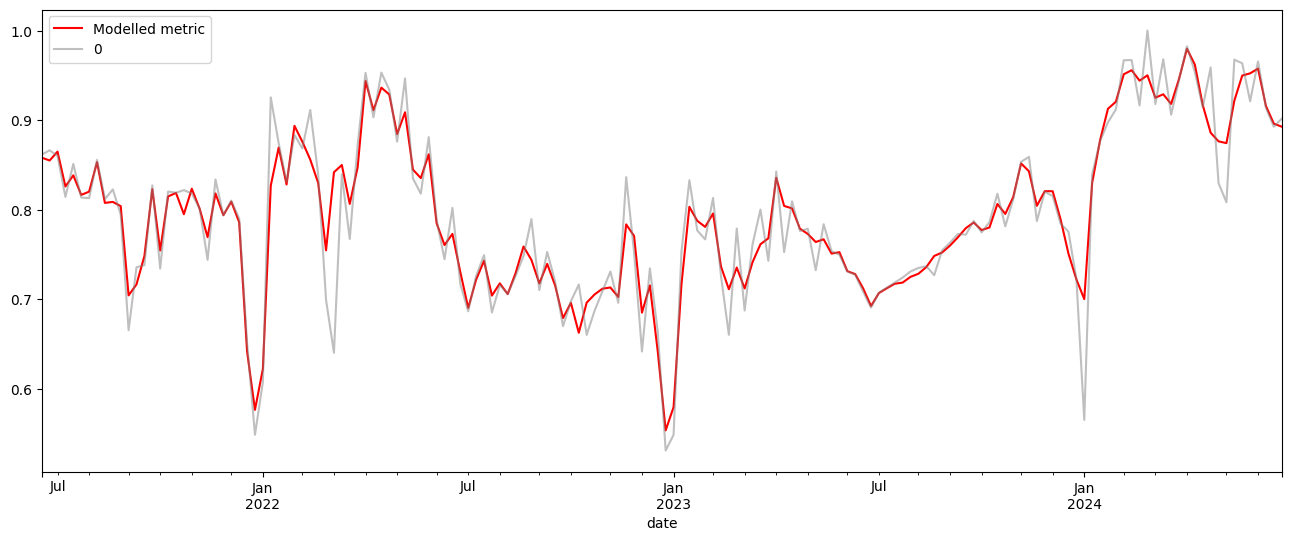

In [29]:
sm1.PlotFit()

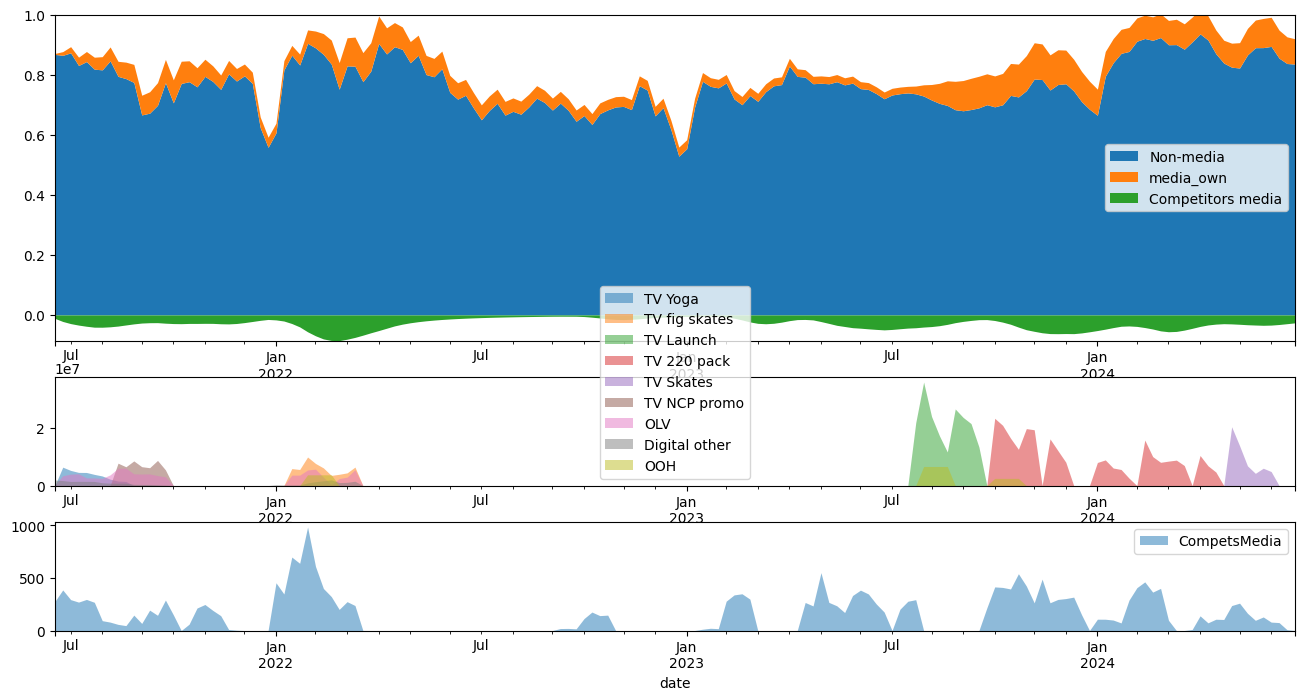

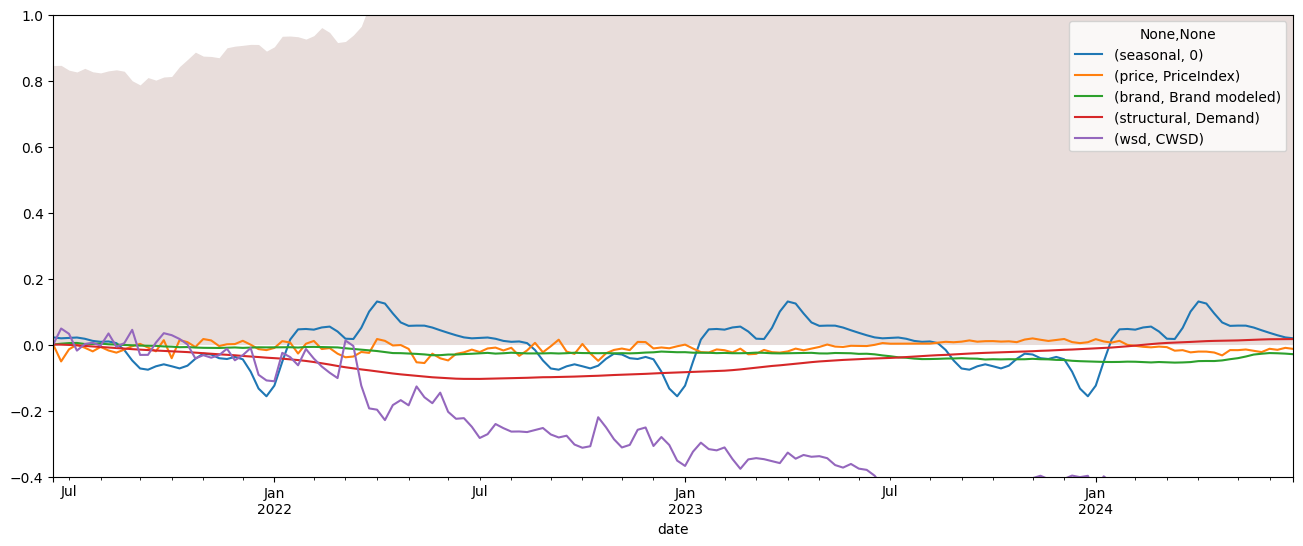

In [32]:
sm1.PlotDecomposition()
sm1.PlotNonmediaDecomposition()

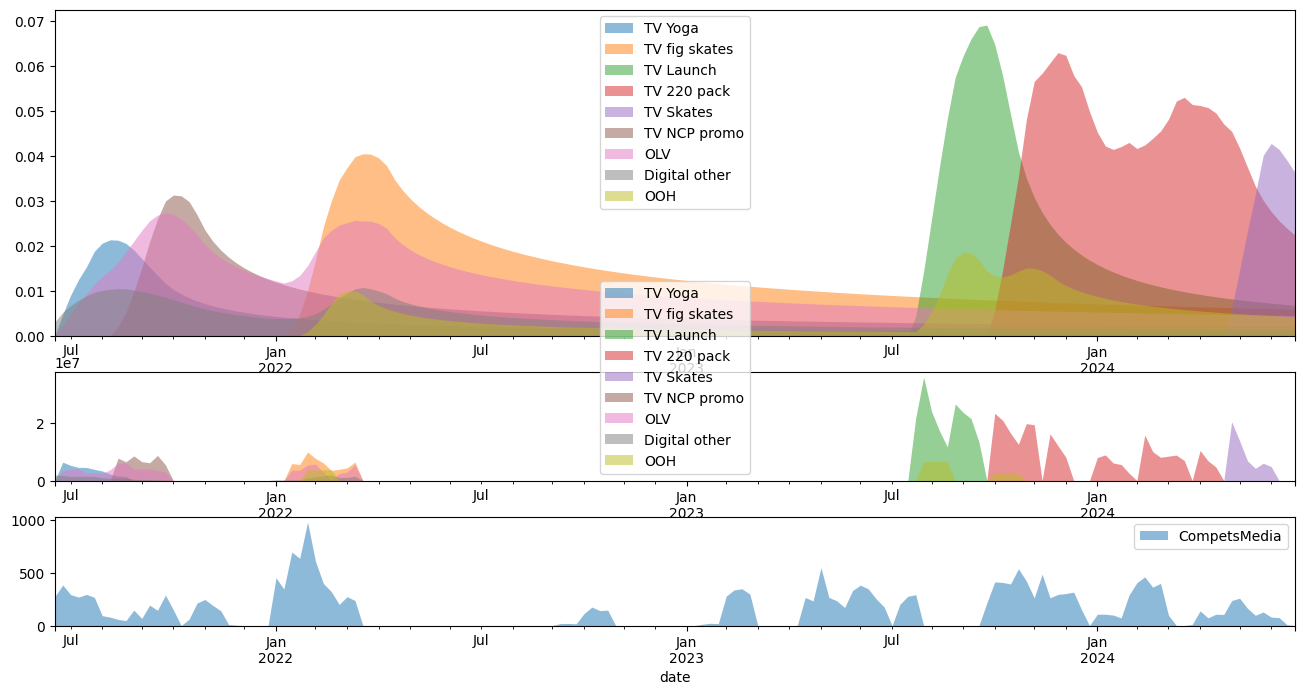

In [31]:
sm1.PlotMediaDecomposition()

## Model 2 no wsd

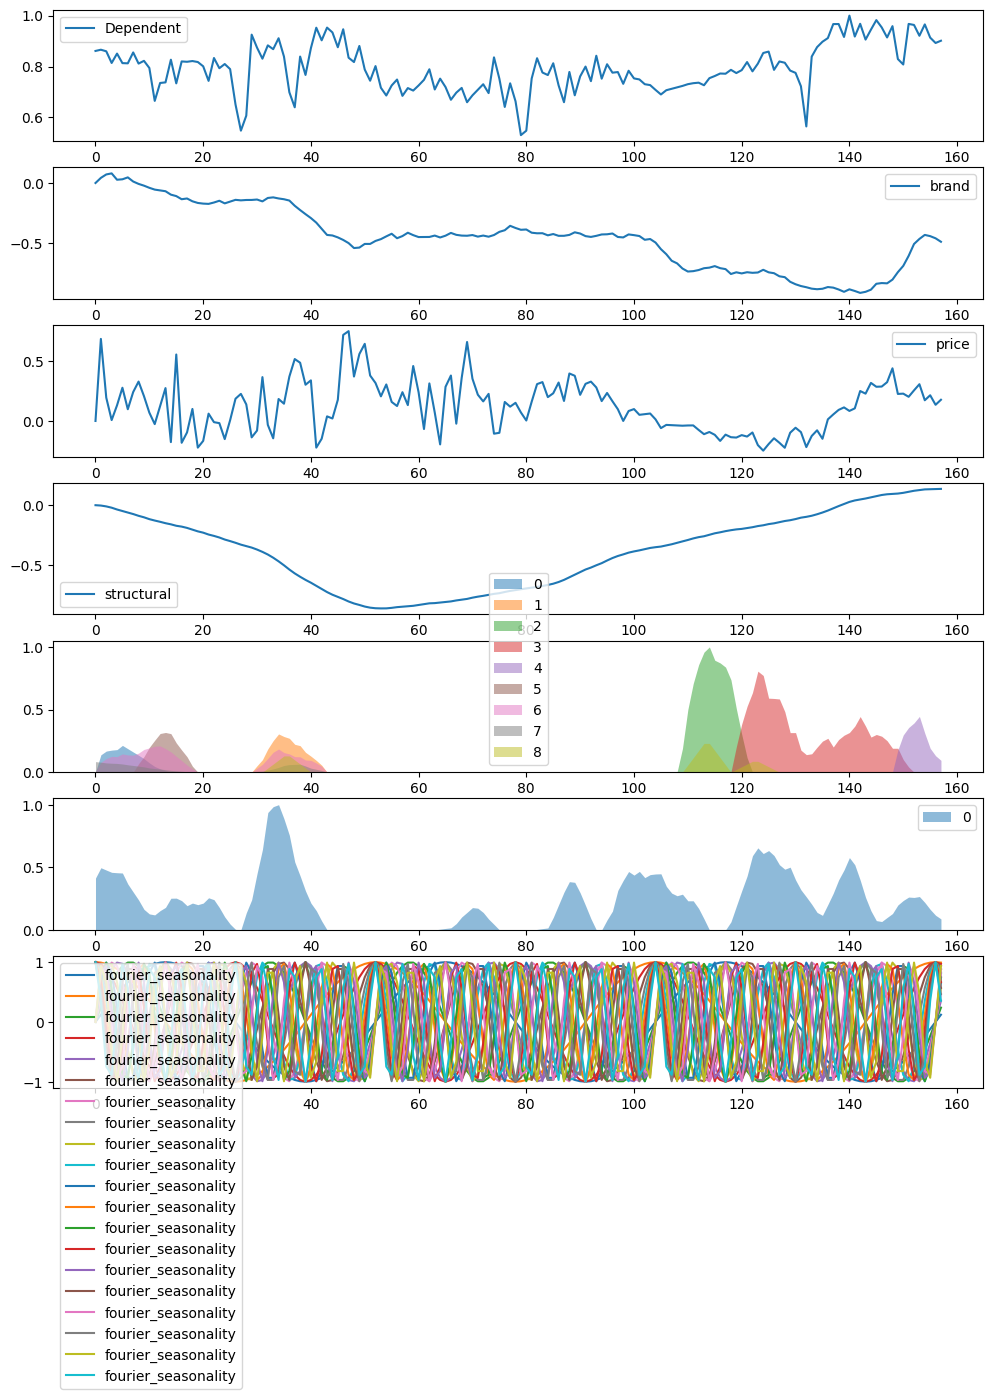

In [34]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['PriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        #'wsd': ['CWSD']
    }
}
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm1.PlotInputs()

In [35]:
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

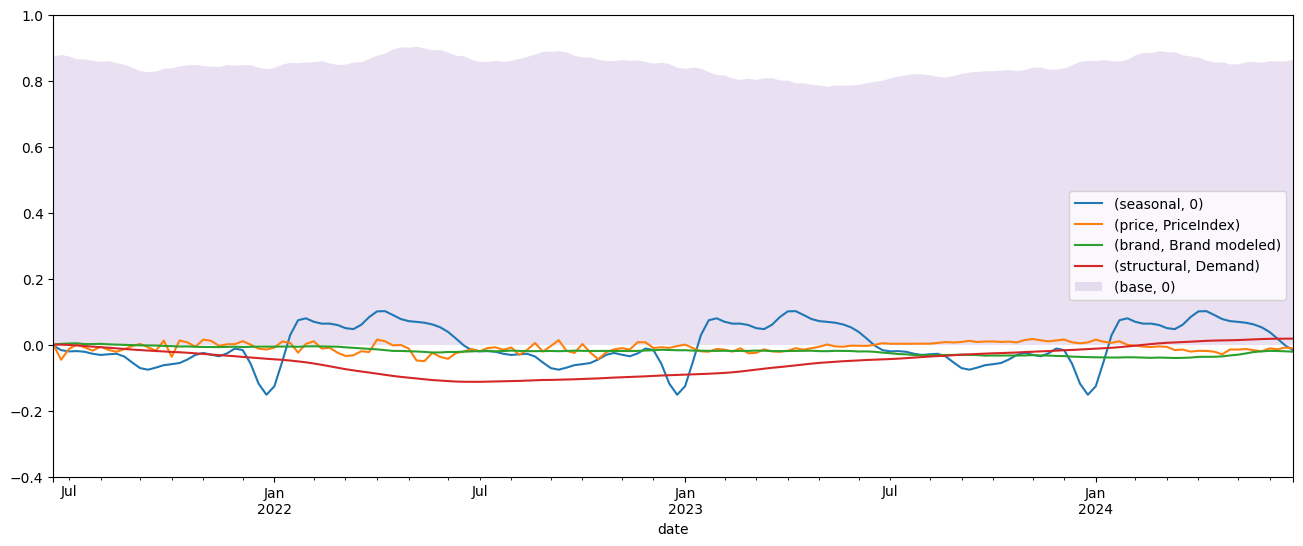

In [57]:
#sm1.PlotFit()
#sm1.PlotDecomposition()
sm1.PlotNonmediaDecomposition()
#sm1.PlotMediaDecomposition()

## Model 3 long / short price

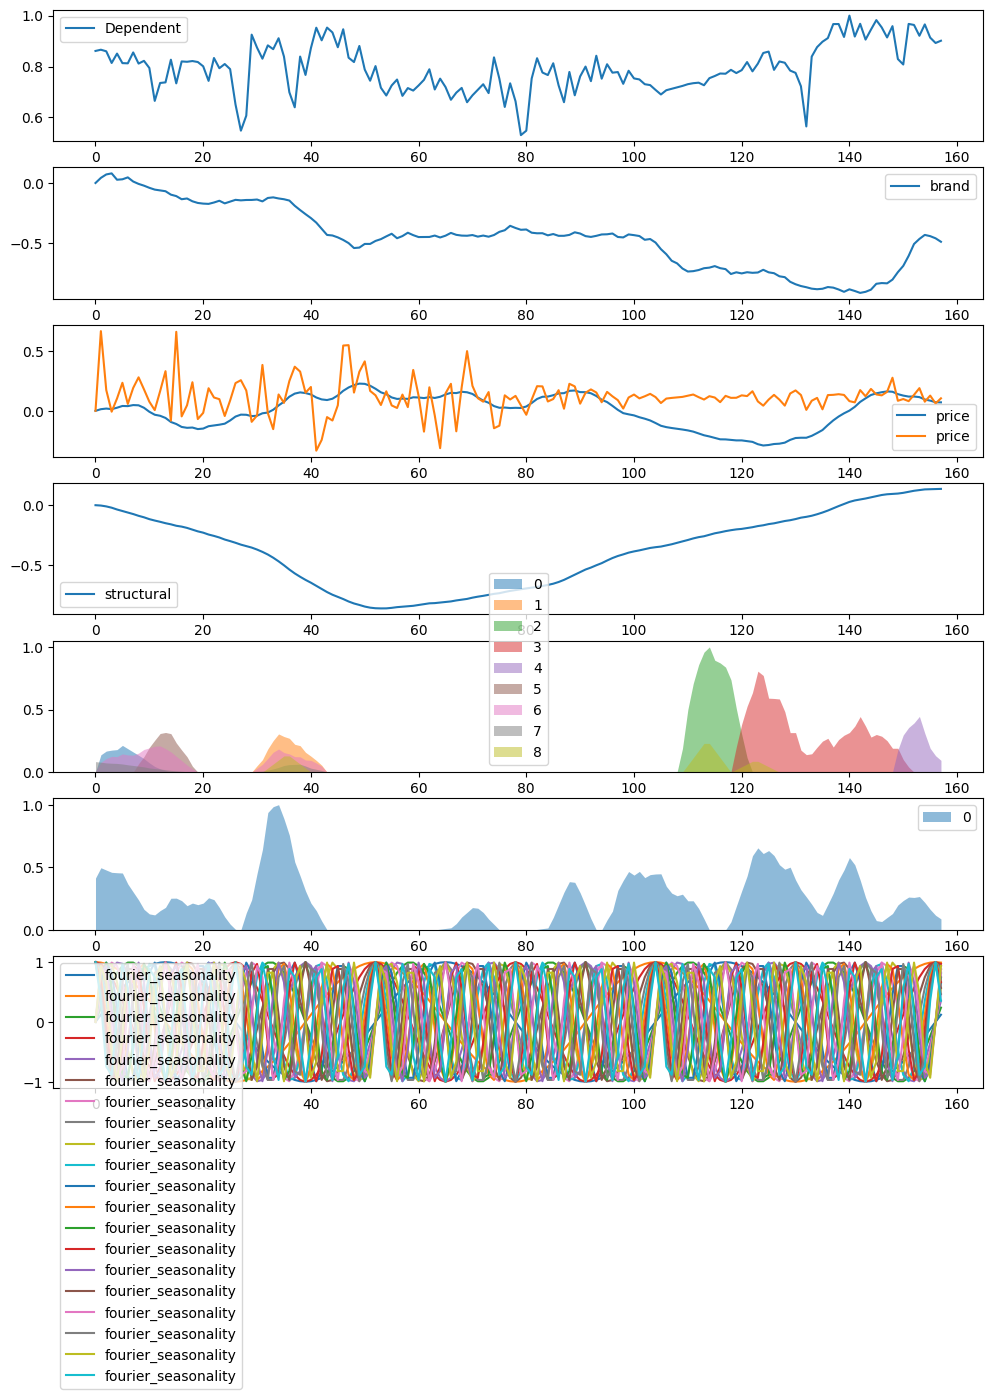

In [60]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['LongPriceIndex', 'ShortPriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        #'wsd': ['CWSD']
    }
}
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm1.PlotInputs()

In [61]:
sm3 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

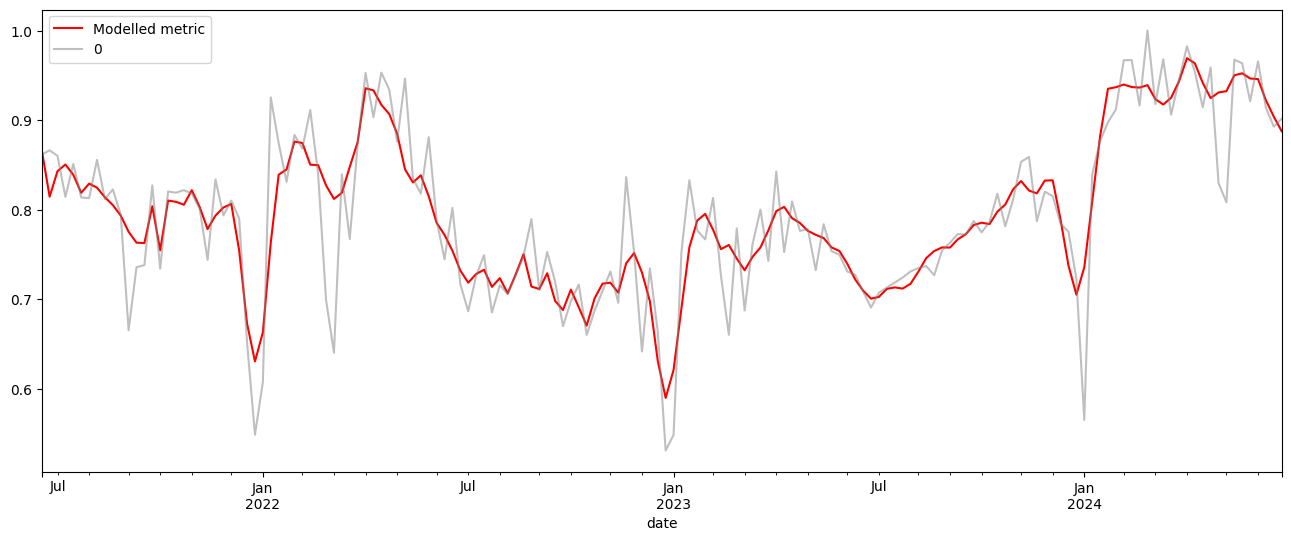

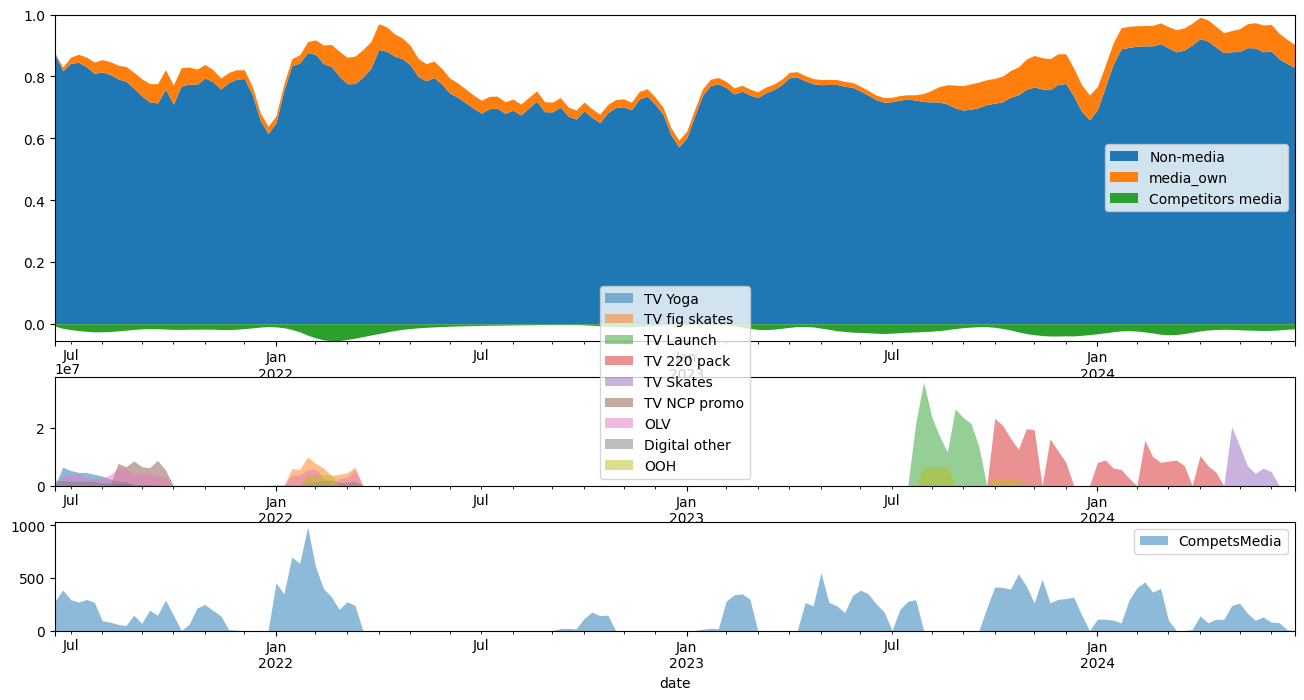

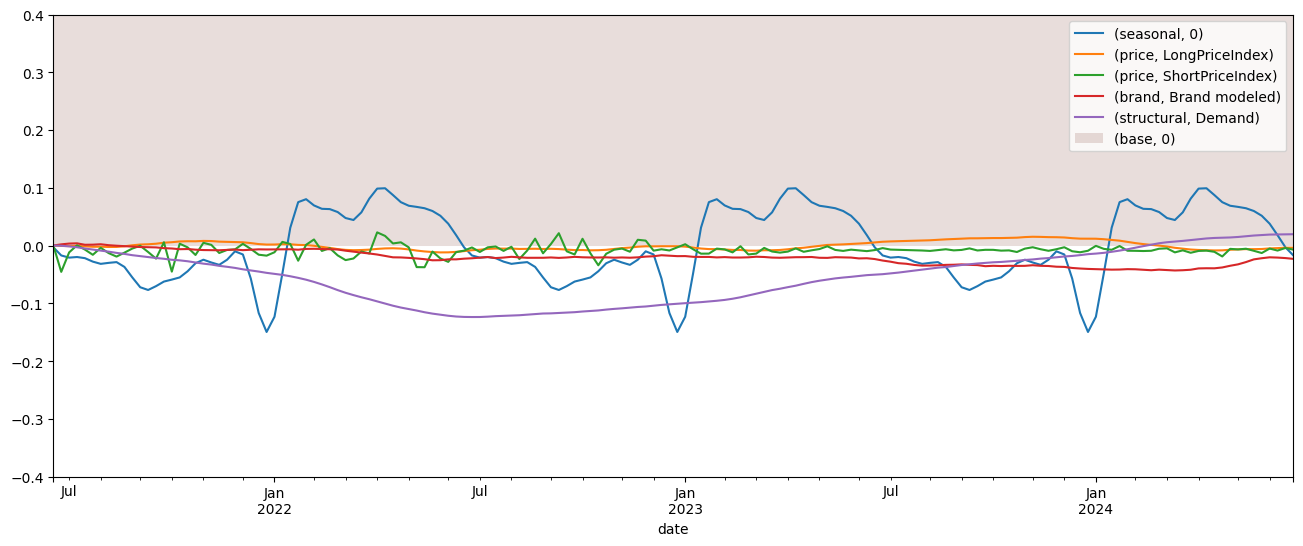

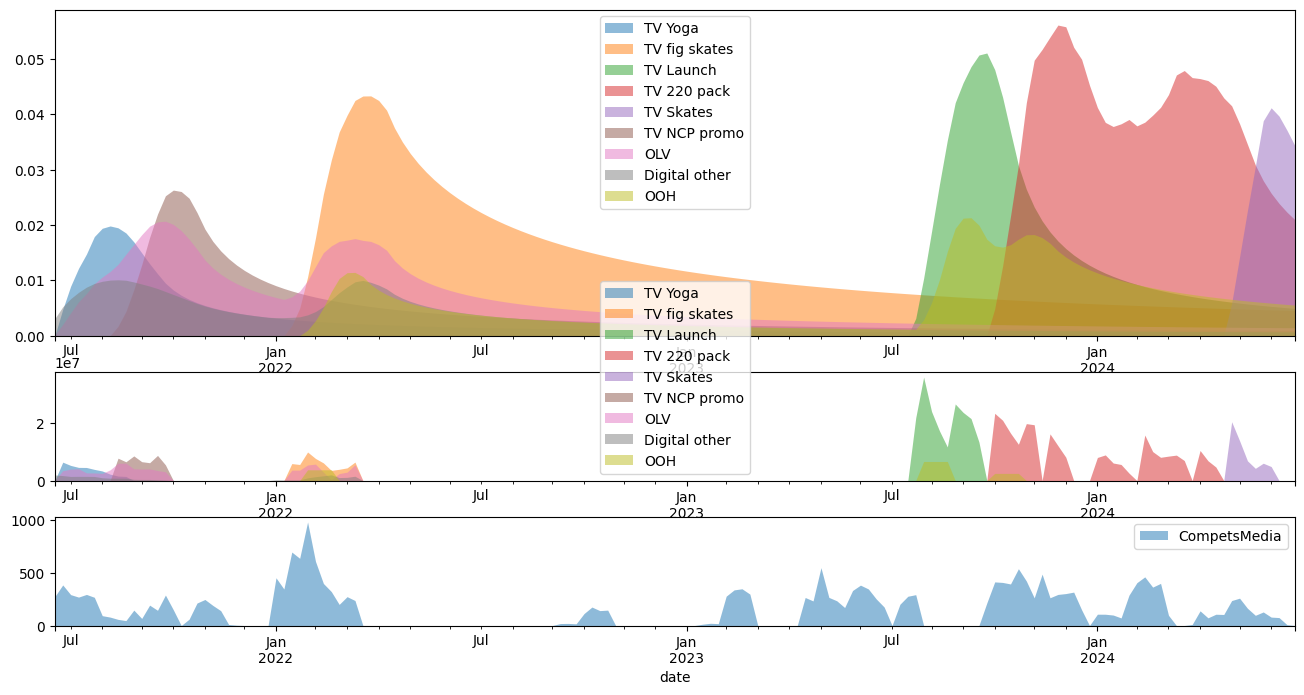

In [64]:
sm3.PlotFit()
sm3.PlotDecomposition()
sm3.PlotNonmediaDecomposition()
sm3.PlotMediaDecomposition()

<Axes: ylabel='Count'>

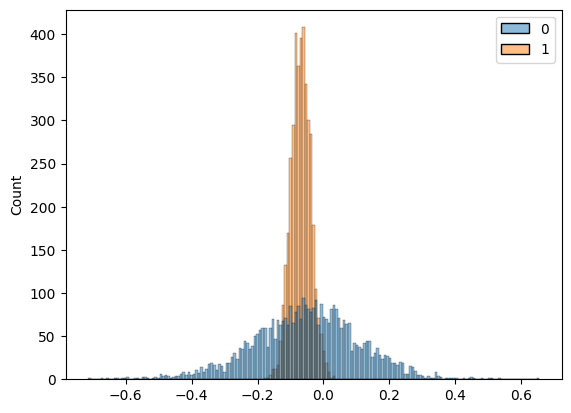

In [68]:
sns.histplot(sm3.GetSamples()['price_beta'])

In [78]:
np.quantile(sm3.GetSamples()['price_beta'], 0.5, axis=0)

array([-0.04819148, -0.06857978])

In [79]:
decomp = sm3.GetDecomposition()

In [97]:
decomp.to_excel(data_folder + 'delete_me.xlsx')

<Axes: xlabel='date', ylabel='CWSD'>

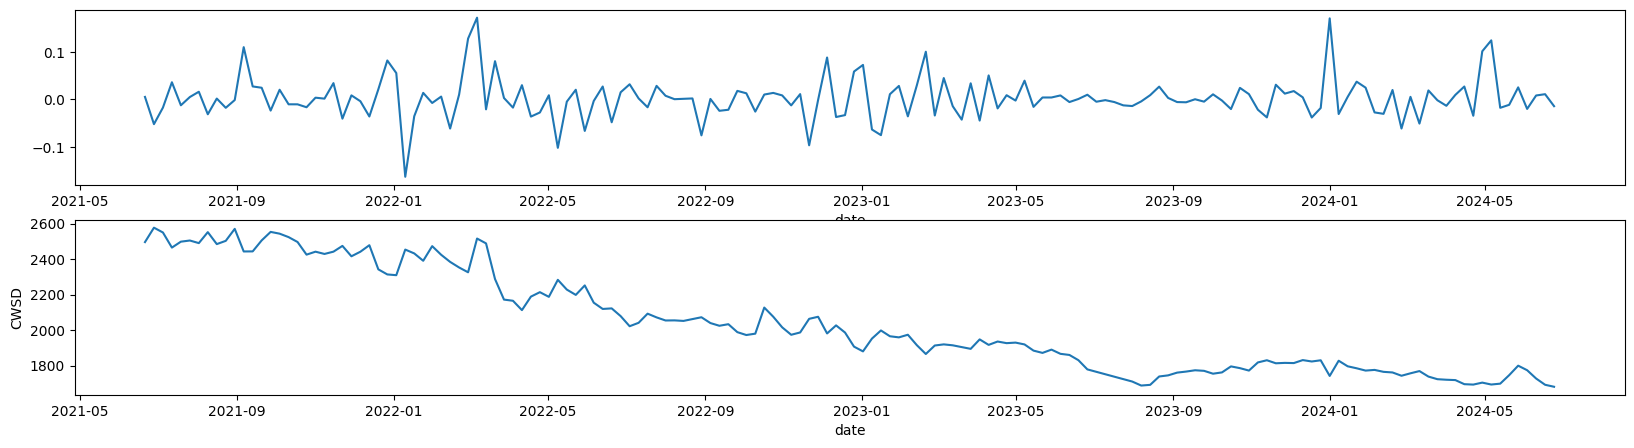

In [96]:
fig, axs = plt.subplots(2,1, figsize=(20, 5))

sns.lineplot(decomp['y'][0] - pd.Series(sm3.y, index=decomp.index), ax=axs[0])
sns.lineplot(data['CWSD'], ax=axs[1])

## Model 4 long / short price + WSD

In [8]:
#data.to_excel(data_folder + 'full_data.xlsx')
data = pd.read_excel(data_folder + 'full_data.xlsx', index_col='date')
data.head()
data.columns

Index(['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates',
       'TV NCP promo', 'OLV', 'Digital other ', 'OOH', 'Radio', 'CWSD', 'WSD',
       'ShelfShare', 'Volume', 'Price', 'PriceIndex', 'Brand', 'Category',
       'CompetsMedia', 'PromoPercent', 'Digital', 'OOH old', 'OOH new',
       'Brand modeled', 'Demand', 'LongPriceIndex', 'ShortPriceIndex'],
      dtype='object')

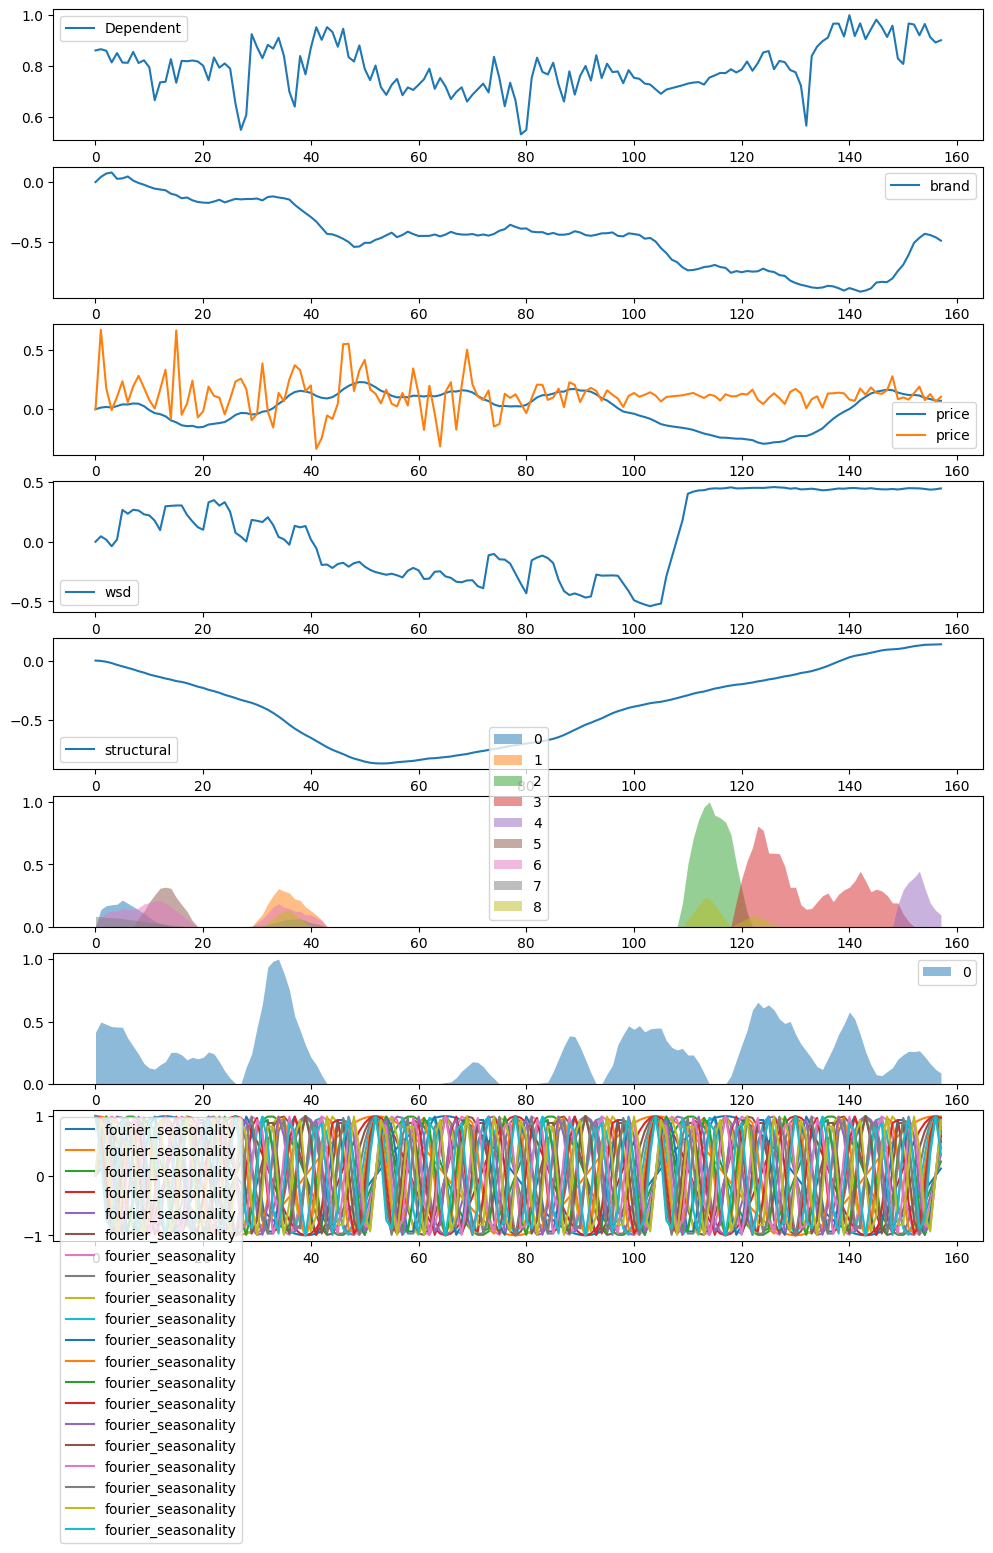

In [100]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['LongPriceIndex', 'ShortPriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        #'wsd': ['CWSD']
        'wsd': ['WSD']
    }
}
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm1.PlotInputs()

In [101]:
sm4 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

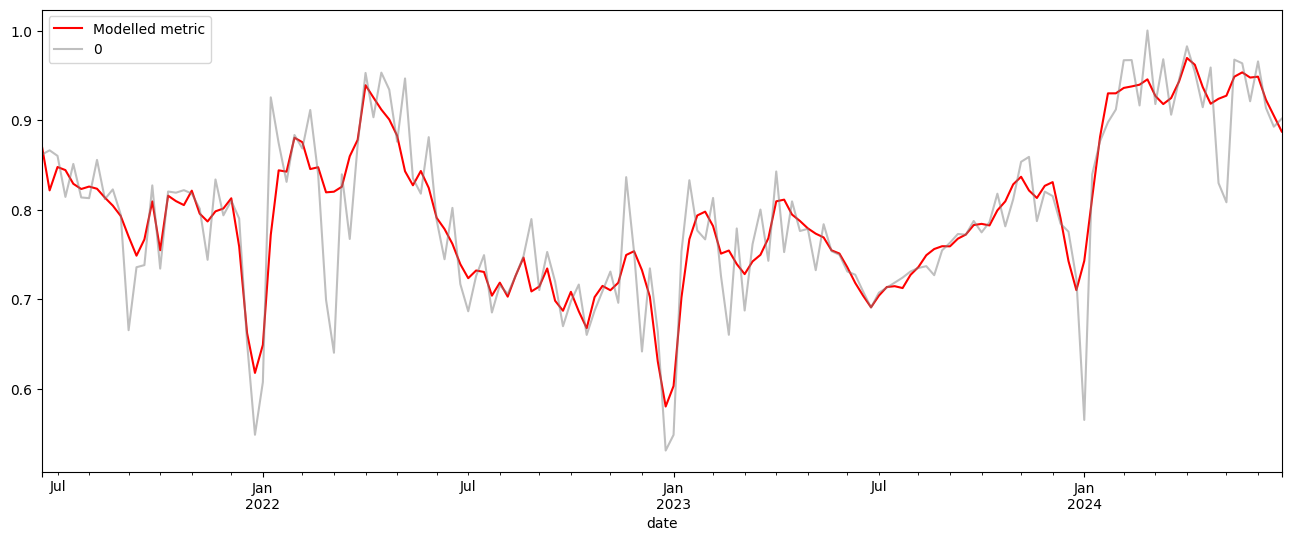

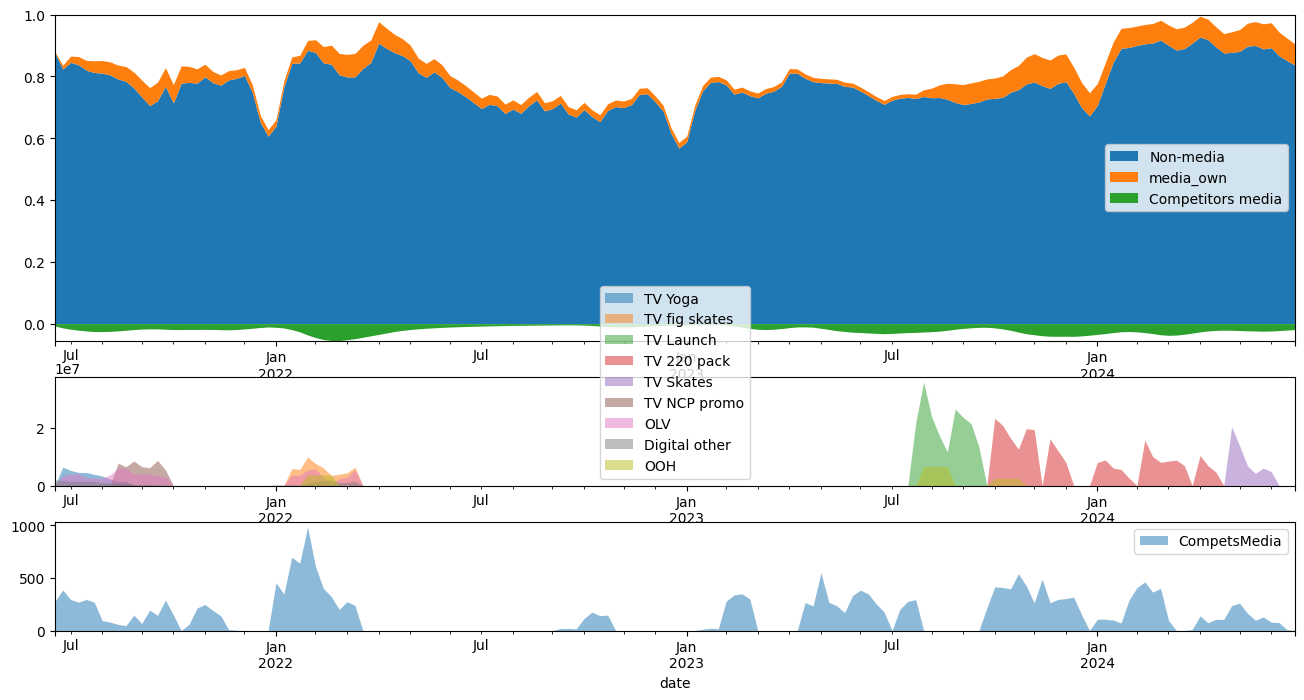

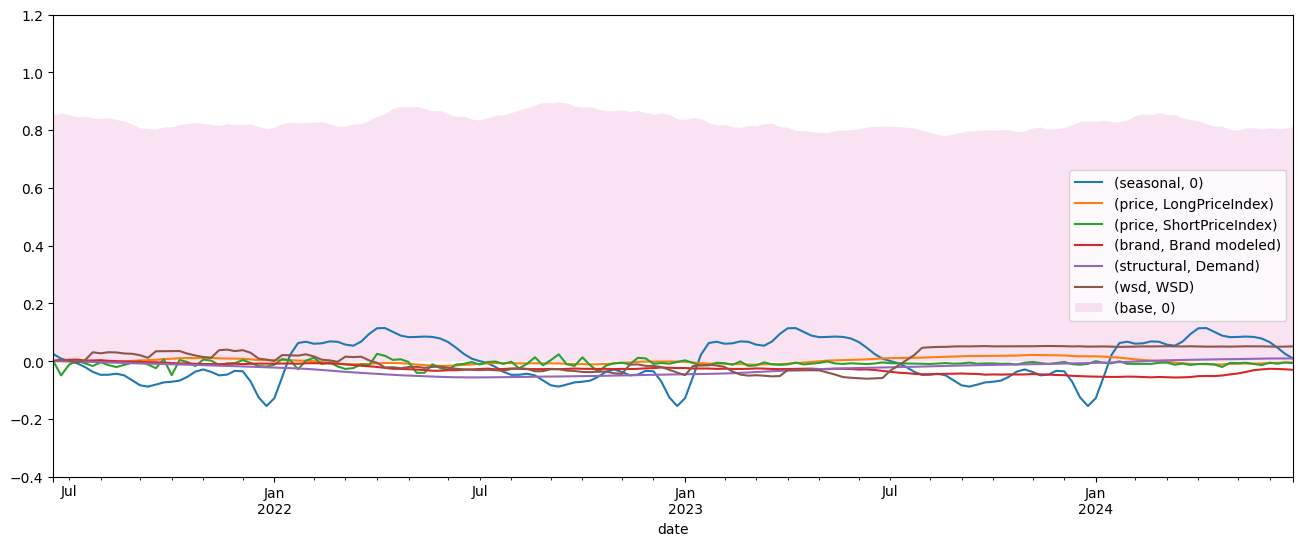

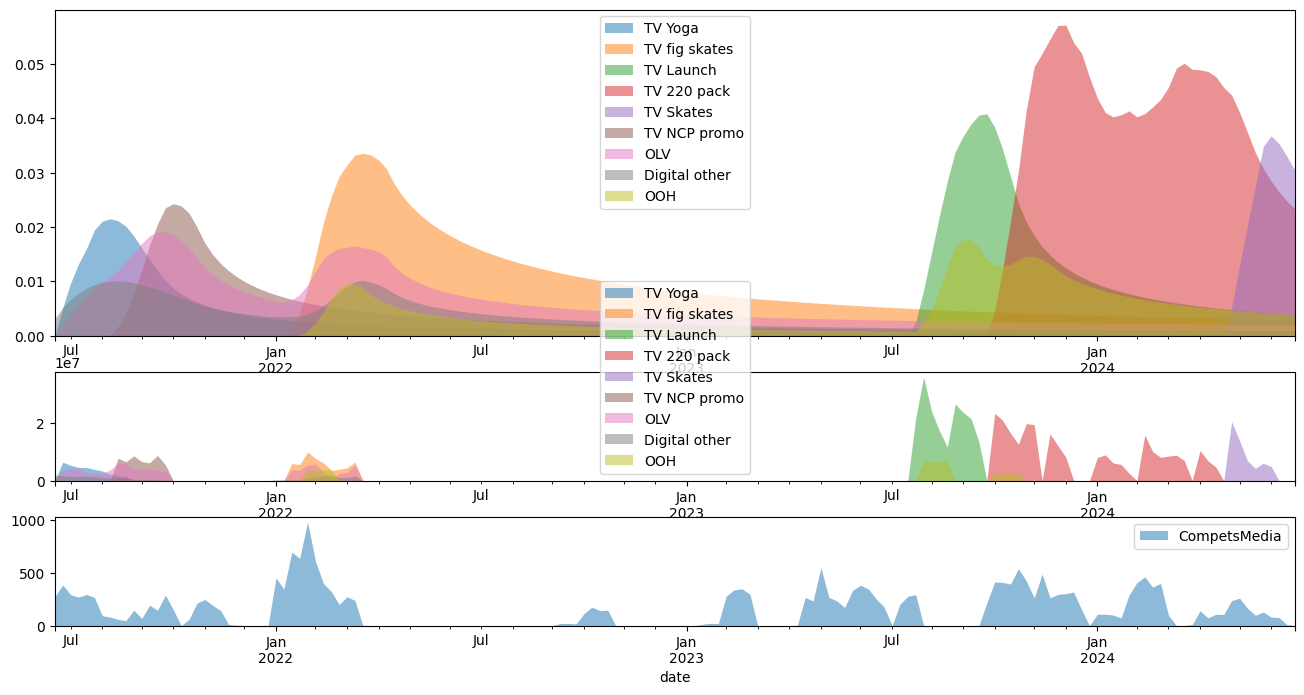

In [104]:
sm4.PlotFit()
sm4.PlotDecomposition()
sm4.PlotNonmediaDecomposition()
sm4.PlotMediaDecomposition()

## Model 5 long / short price + WSD

In [9]:
data.columns

Index(['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates',
       'TV NCP promo', 'OLV', 'Digital other ', 'OOH', 'Radio', 'CWSD', 'WSD',
       'ShelfShare', 'Volume', 'Price', 'PriceIndex', 'Brand', 'Category',
       'CompetsMedia', 'PromoPercent', 'Digital', 'OOH old', 'OOH new',
       'Brand modeled', 'Demand', 'LongPriceIndex', 'ShortPriceIndex'],
      dtype='object')

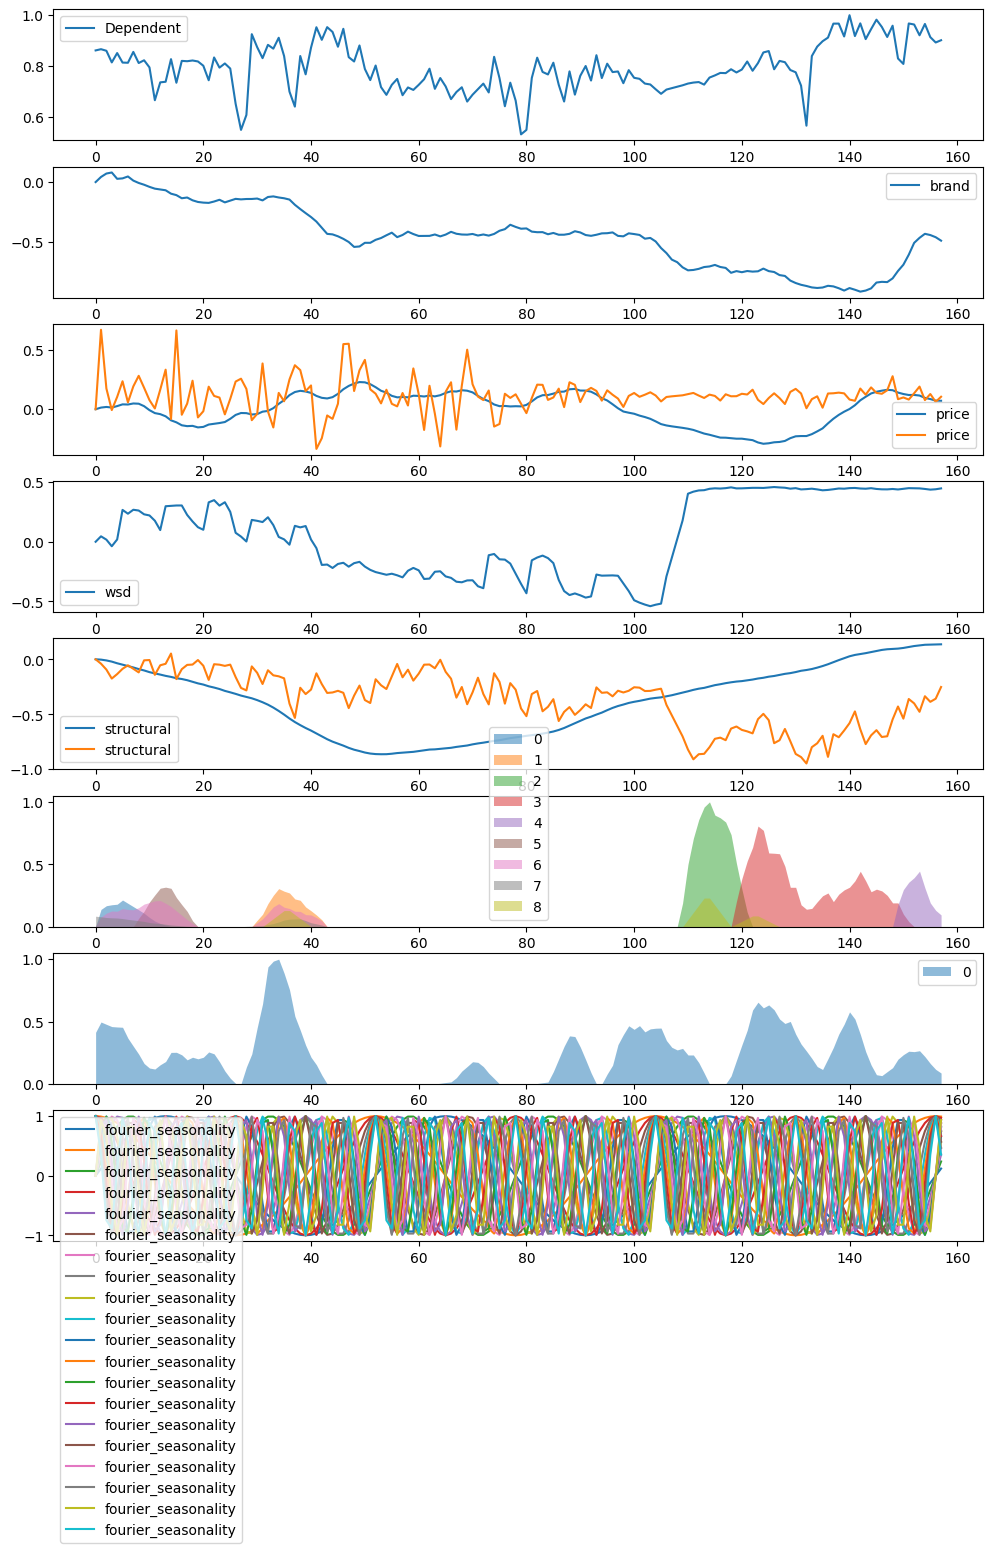

In [10]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['LongPriceIndex', 'ShortPriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand', 'PromoPercent'],
        #'wsd': ['CWSD']
        'wsd': ['WSD']
    }
}
sm5 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm5.PlotInputs()

In [11]:
sm5 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

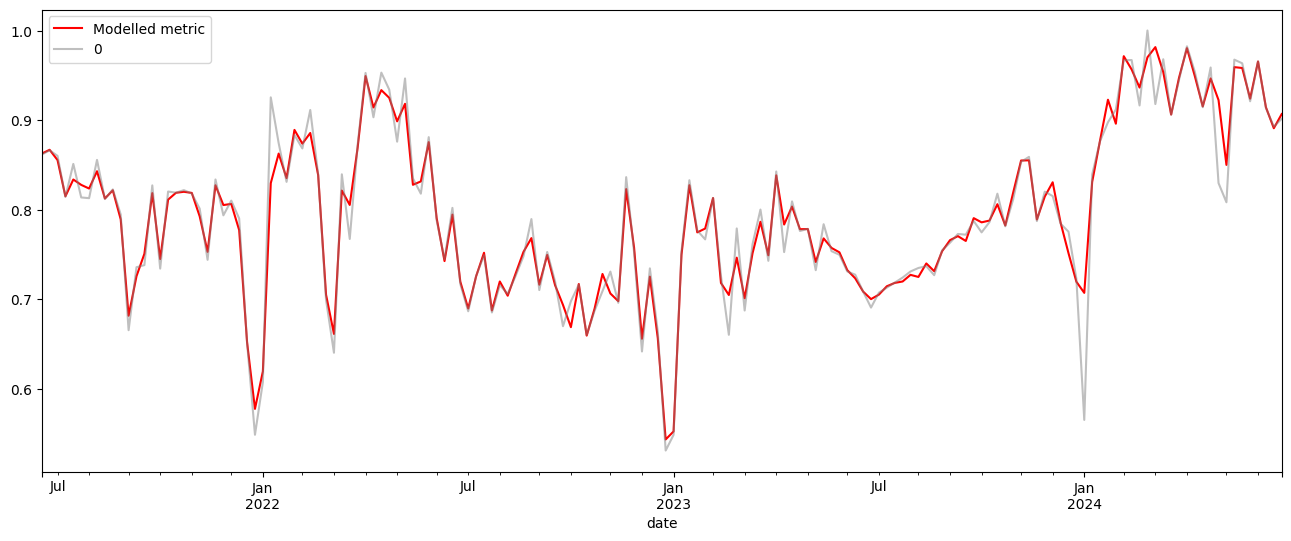

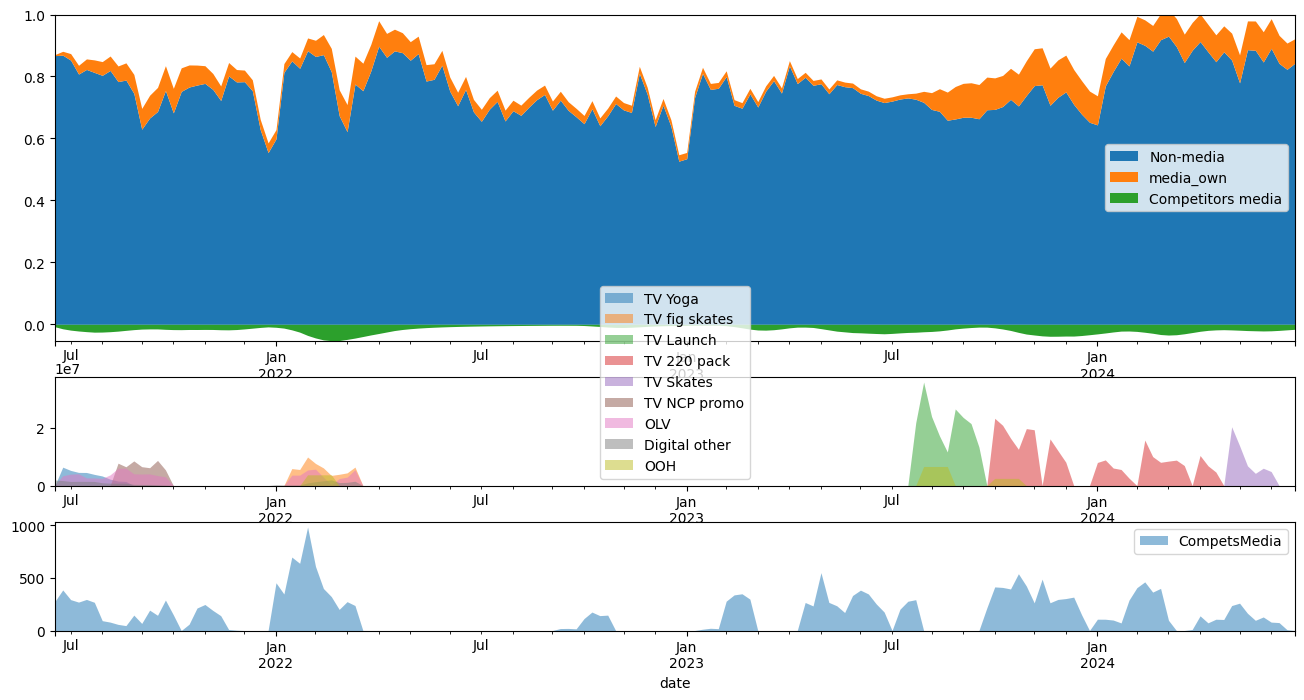

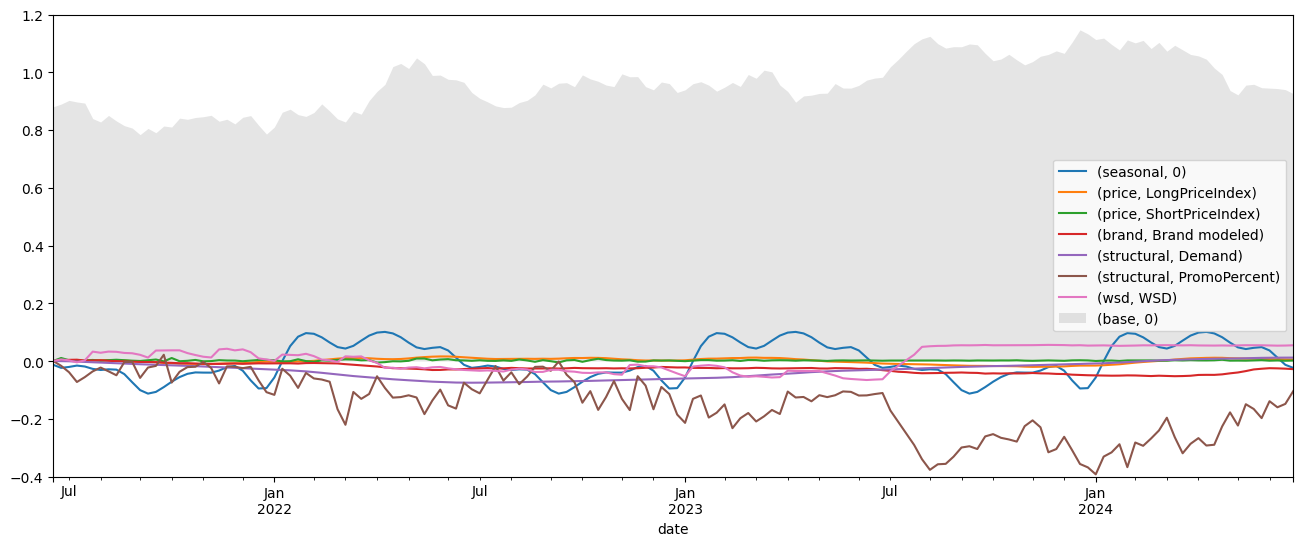

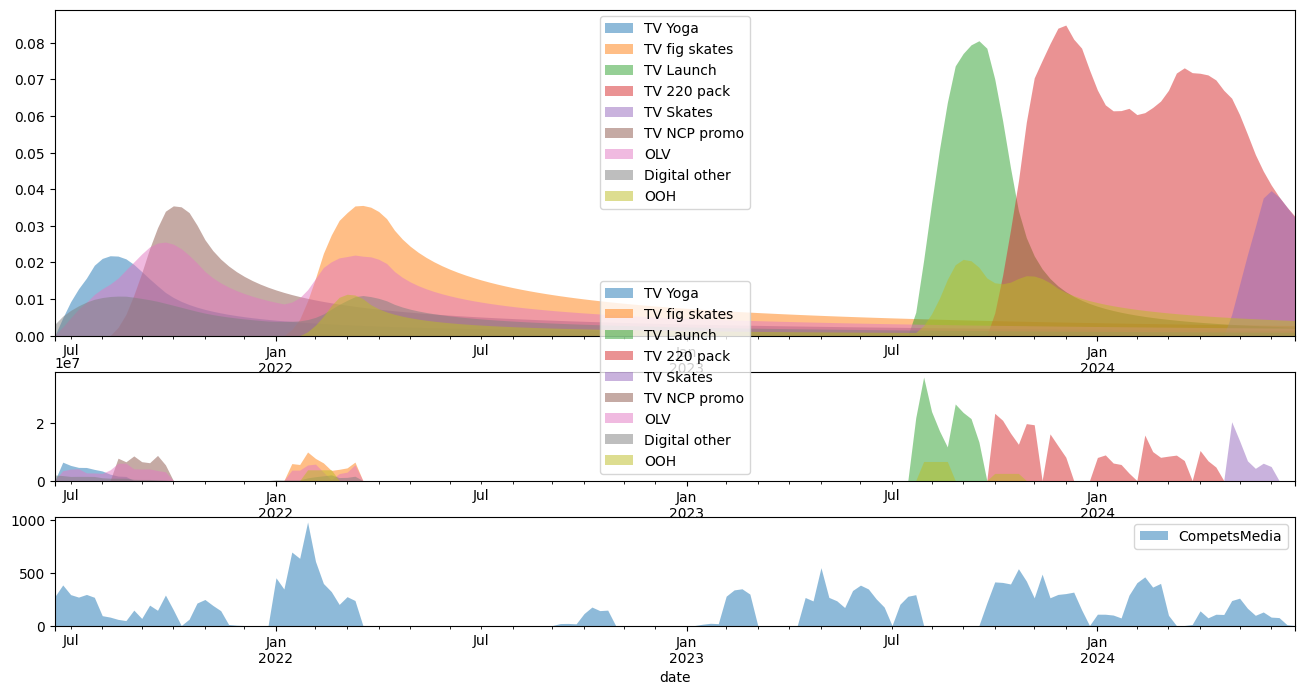

In [13]:
sm5.PlotFit()
sm5.PlotDecomposition()
sm5.PlotNonmediaDecomposition()
sm5.PlotMediaDecomposition()